### Task 1 - Learn basics of Keras and TensorFlow

#### PART I: Geron's textbook

In [7]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

/home/justin/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Experimenting with the code in Chapter 10 of Geron's textbook

In [2]:
print(tf.__version__)
print(keras.__version__)

2.1.0
2.2.4-tf


In [3]:
# Load the Fashion MNIST dataset

fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [4]:
print(X_train_full.shape)
print(X_train_full.dtype)

(60000, 28, 28)
uint8


In [5]:
# Create a validation set

X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:] 

In [6]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
              "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [7]:
# Create model using sequential API

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape = [28, 28]),
    keras.layers.Dense(300, activation = "relu"),
    keras.layers.Dense(100, activation = "relu"),
    keras.layers.Dense(10, activation = "softmax")
])

In [8]:
# Obtain model's list of layers 

model.summary()
model.layers
hidden1 = model.layers[1]
model.get_layer('dense') is hidden1

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


True

In [9]:
# Obtain weights and biases for the first layer

weights, biases = hidden1.get_weights()
print(weights.shape)
print(biases.shape)

(784, 300)
(300,)


In [10]:
# Compiling the model - i.e. specify loss function and optimizer

model.compile(loss = "sparse_categorical_crossentropy",
             optimizer = keras.optimizers.SGD(lr = 0.01),
             metrics = ["accuracy"])

In [11]:
# Training and evaluating the model

history = model.fit(X_train, y_train, 
                    epochs = 30,
                    validation_data = (X_valid, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/30
55000/55000 [==============================] - 4s 65us/sample - loss: 0.7238 - accuracy: 0.7640 - val_loss: 0.5223 - val_accuracy: 0.8190
Epoch 2/30
55000/55000 [==============================] - 3s 63us/sample - loss: 0.4915 - accuracy: 0.8287 - val_loss: 0.4739 - val_accuracy: 0.8322
Epoch 3/30
55000/55000 [==============================] - 4s 67us/sample - loss: 0.4464 - accuracy: 0.8447 - val_loss: 0.4122 - val_accuracy: 0.8630
Epoch 4/30
55000/55000 [==============================] - 3s 54us/sample - loss: 0.4171 - accuracy: 0.8557 - val_loss: 0.4022 - val_accuracy: 0.8590
Epoch 5/30
55000/55000 [==============================] - 3s 54us/sample - loss: 0.3979 - accuracy: 0.8600 - val_loss: 0.3939 - val_accuracy: 0.8640
Epoch 6/30
55000/55000 [==============================] - 3s 54us/sample - loss: 0.3807 - accuracy: 0.8661 - val_loss: 0.3732 - val_accuracy: 0.8718
Epoch 7/30
55000/55000 [==============================] -

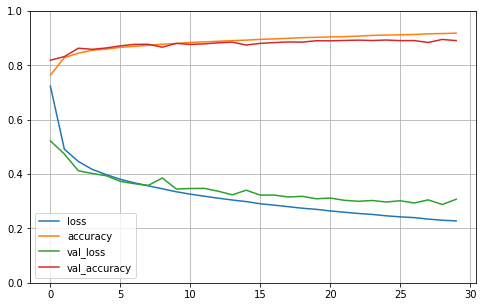

In [12]:
history.params
history.epoch
history.history

# Plot the loss and accuracy. 
# NOTE: validation error is computed at the end of each epoch, while
# the training error is computed using a running mean during each 
# epoch. So the training curve should be shifted by half an epoch to 
# the left. 

pd.DataFrame(history.history).plot(figsize = (8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [11]:
# Evaluate the model on the test set

model.evaluate(X_test, y_test)

10000/10000 [==============================] - 1s 78us/sample - loss: 165.3511 - accuracy: 0.0917


[165.3510673339844, 0.0917]

In [12]:
# Use the model to make predictions

X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

y_pred = model.predict_classes(X_new)
print(np.array(class_names)[y_pred])

y_new = y_test[:3]
np.array(class_names)[y_new]

['Coat' 'Trouser' 'Trouser']


array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

#### Building a Regression MLP using the sequential API

California housing problem, using a regression neural network to tackle the problem. 

In [13]:
# Load data, split into a training set, validation set and test set 
# and scale the features

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.fit_transform(X_valid)
X_test = scaler.fit_transform(X_test)

In [ ]:
# Specify the model and train it

model = keras.models.Sequential([
    keras.layers.Dense(30, activation = "relu",
                      input_shape = X_train.shape[1:]),
    keras.layers.Dense(1)
])

model.compile(loss = "mean_squared_error",
             optimizer = "sgd")

history = model.fit(X_train, y_train, 
                   epochs = 20,
                   validation_data = (X_valid, y_valid))

In [ ]:
# Evaluate the model

model.evaluate(X_test, y_test)

X_new = X_test[:3]
y_pred = model.predict(X_new)

### From Sequential APIs to Functional APIs

In [ ]:
# Neural net Fig. 10-14 p.309 

input_ = keras.layers.Input(shape = X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation = "relu")(input_)
hidden2 = keras.layers.Dense(30, activation = "relu")(hidden1)
concat = keras.layers.Concatenate()([input_, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.Model(inputs = [input_], outputs = [output])

In [ ]:
# Neural net Fig. 10-15 p.310
# NOTE: we now have multiple inputs!

input_A = keras.layers.Input(shape = [5], name = "wide_input")
input_B = keras.layers.Input(shape = [6], name = "deep_input")
hidden1 = keras.layers.Dense(30, activation = "relu")(input_B)
hidden2 = keras.layers.Dense(30, activation = "relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name = "output")(concat)
model = keras.Model(inputs = [input_A, input_B], outputs = [output])

In [ ]:
model.compile(loss = "mse",
             optimizer = keras.optimizers.SGD(lr = 1e-3))

X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]

history = model.fit((X_train_A, X_train_B), y_train,
                   epochs = 20,
                   validation_data = ((X_valid_A, X_valid_B), y_valid))

In [ ]:
model.evaluate((X_test_A, X_test_B), y_test)
y_pred = model.predict((X_new_A, X_new_B))

In [ ]:
# Adding extra outputs, neural net of Fig. 10-16 p.312

input_A = keras.layers.Input(shape = [5], name = "wide_input")
input_B = keras.layers.Input(shape = [6], name = "deep_input")
hidden1 = keras.layers.Dense(30, activation = "relu")(input_B)
hidden2 = keras.layers.Dense(30, activation = "relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name = "main_output")(concat)
aux_output = keras.layers.Dense(1, name = "aux_output")(hidden2)
model = keras.Model(inputs = [input_A, input_B], outputs = [output, aux_output])

model.compile(loss = ["mse", "mse"],
             loss_weights = [0.9, 0.1], 
             optimizer = keras.optimizers.SGD(lr = 1e-3))

history = model.fit([X_train_A, X_train_B], [y_train, y_train],
                   epochs = 20,
                   validation_data = ([X_valid_A, X_valid_B], [y_valid, y_valid]))

In [ ]:
total_loss, main_loss, aux_loss = model.evaluate(
    [X_test_A, X_test_B], [y_test, y_test])

y_pred_main, y_pred_aux = model.predict([X_new_A, X_new_B])

### Using the subclassing API to build Dynamic Models

NOTE: dynamic models are excellent for experimenting and doing research, but the flexibility comes at a cost. The model's architecture is hidden within the `call()` method, so Keras cannot easily inspect it.

In [ ]:
# Equivalent model to the previous one, but now more dynamic


# class WideAndDeepModel(keras.Model):
#    def __init__(self, units = 30, activation = "relu", **kwargs):
#        super().__init__(**kwargs) #handles standard args, e.g. 'name'
#        self.hidden1 = keras.layers.Dense(units, activation = activation)
#        self.hidden2 = keras.layers.Dense(units, activation = activation)
#        self.main_output = keras.layers.Dense(1)
#        self.aux_output = keras.layers.Dense(1)

#    def call(self, inputs):
#        input_A, input_B = inputs
#        hidden1 = self.hidden1(input_B)
#        hidden2 = self.hidden2(hidden1)
#        concat = keras.layers.concatenate([input_A, hidden2])
#        main_output = self.main_output(concat)
#        aux_output = self.aux_output(hidden2)
#        return main_output, aux_output
    
# model = WideAndDeepModel()

### Saving and restoring a model

In [ ]:
model.save("my_first_model.h5")
model = keras.models.load_model("my_first_model.h5")

In [ ]:
# When training lasts several hours, you can use callbacks

checkpoint_cb = keras.callbacks.ModelCheckpoint("my_first_model.h5")
history = model.fit([X_train_A, X_train_B], [y_train, y_train], 
                    epochs = 10,
                    callbacks = [checkpoint_cb])

In [ ]:
# Implement early stopping

checkpoint_cb = keras.callbacks.ModelCheckpoint("my_first_model.h5",
                                               save_best_only = True)
history = model.fit([X_train_A, X_train_B], [y_train, y_train], 
                    epochs = 10,
                    callbacks = [checkpoint_cb])
model = keras.models.load_model("my_first_model.h5")

In [ ]:
# Combine with 'EarlyStopping()'

early_stopping_cb = keras.callbacks.EarlyStopping(patience = 10,
                                                 restore_best_weights = True)

history = model.fit([X_train_A, X_train_B], [y_train, y_train], 
                    epochs = 100,
                    callbacks = [checkpoint_cb, early_stopping_cb])

### Using TensorBoard for visualization

In [ ]:
# Define the root log directory and a small function that generates
# a subdirectory path 

import os
root_logdir = os.path.join(os.curdir, "my_logs")

def get_run_logdir():
    import time
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)

run_logdir = get_run_logdir()

In [ ]:
model = keras.models.load_model("my_first_model.h5")
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
history = model.fit([X_train_A, X_train_B], [y_train, y_train], 
                    epochs = 30,
                    validation_data = ([X_valid_A, X_valid_B], [y_valid, y_valid]),
                    callbacks = [tensorboard_cb])

In [ ]:
model.compile(loss = "mse",
             optimizer = keras.optimizers.SGD(lr = 5e-3))


model = keras.models.load_model("my_first_model.h5")

run_logdir = get_run_logdir()

tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)

history = model.fit([X_train_A, X_train_B], [y_train, y_train], 
                    epochs = 30,
                    validation_data = ([X_valid_A, X_valid_B], [y_valid, y_valid]),
                    callbacks = [tensorboard_cb])

In [ ]:
test_logdir = get_run_logdir()
write = tf.summary.create_file_writer(test_logdir)

with write.as_default():
    for step in range(1, 1000 + 1):
        tf.summary.scalar("my_scalar", np.sin(step / 10), step = step)
        data = (np.random.randn(100) + 2) * step / 100
        tf.summary.histogram("my_hist", data, buckets = 50, step = step)
        images = np.random.rand(2, 32, 32, 3)
        tf.summary.image("my_images", images * step / 1000, step = step)
        texts = ["The step is " + str(step), "Its square is " + str(step**2)]
        tf.summary.text("my_text", texts, step = step)
        sine_wave = tf.math.sin(tf.range(12000) / 48000 * 2 * np.pi * step)
        audio = tf.reshape(tf.cast(sine_wave, tf.float32), [1, -1, 1])
        tf.summary.audio("my_audio", audio, sample_rate = 48000, step = step)

### Fine-tuning the hyperparameters

In [9]:
# Option 1: use `GridSearchCV' or `RandomizedSearchCV' to explore th
# hyperparameter space

def BuildModel(n_hidden = 1, n_neurons = 30, learning_rate = 3e-3, input_shape = [8]):
    model = keras.models.Sequential()
    model.add(keras.layers.InputLayer(input_shape = input_shape))
    
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons, activation = "relu"))
        
    model.add(keras.layers.Dense(1))
    optimizer = keras.optimizers.SGD(lr = learning_rate)
    
    model.compile(loss = "mse", optimizer = optimizer)
    
    return model

In [10]:
# Create a KerasRegressor based on the above function

keras_reg = keras.wrappers.scikit_learn.KerasRegressor(BuildModel)

In [ ]:
# Train it

keras_reg.fit(X_train, y_train, 
              epochs = 100,
              validation_data = (X_valid, y_valid),
              callbacks = [keras.callbacks.EarlyStopping(patience = 10)])

In [ ]:
mse_test = keras_reg.score(X_test, y_test)
y_pred = keras_reg.predict(X_new)

In [3]:
from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

In [ ]:
param_distribs = {
    "n_hidden": [0, 1, 2, 3],
    "n_neurons": np.arange(1, 100),
    "learning_rate": reciprocal(3e-4, 3e-2),
}

rnd_search_cv = RandomizedSearchCV(keras_reg, 
                                   param_distribs, 
                                   n_iter = 10, 
                                   cv = 3)

rnd_search_cv.fit(X_train, y_train, 
                 epochs = 100,
                 validation_data = (X_valid, y_valid),
                 callbacks = [keras.callbacks.EarlyStopping()])

In [ ]:
print(rnd_search_cv.best_params_)
print(rnd_search_cv.best_score_)

model = rnd_search_cv.best_estimator_.model
